<a href="https://colab.research.google.com/github/urmilaun/-Website/blob/main/Copy_of_Untitled26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ar = pd.read_csv('AirQuality.csv',sep=';') 
ar.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

In [ ]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [ ]:
ar.drop(['CO(GT)','Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [ ]:
ar.replace(to_replace=',',value='.', regex = True, inplace = True)

for i in 'C6H6(GT) T RH AH'.split():
  ar[i] = pd.to_numeric(ar[i], errors='coerce')

In [ ]:
ar.replace(to_replace=-200,value=np.nan,inplace=True) 
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.0+ MB


In [ ]:
ar['Date'] = pd.to_datetime(ar['Date'],dayfirst=True)
ar['Time'] = pd.to_datetime(ar['Time'],format= '%H.%M.%S' ).dt.time 
ar.head()

Date      Time  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10  18:00:00       1360.0     150.0      11.9         1046.0   
1 2004-03-10  19:00:00       1292.0     112.0       9.4          955.0   
2 2004-03-10  20:00:00       1402.0      88.0       9.0          939.0   
3 2004-03-10  21:00:00       1376.0      80.0       9.2          948.0   
4 2004-03-10  22:00:00       1272.0      51.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

In [ ]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    8991 non-null   float64       
 3   NMHC(GT)       914 non-null    float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1.0+ MB


In [ ]:
sns.set_theme(style="whitegrid")

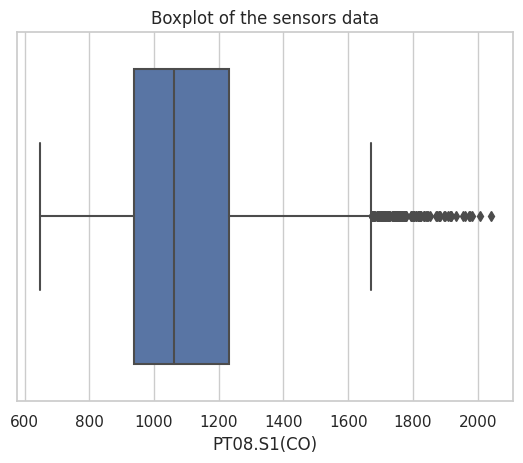

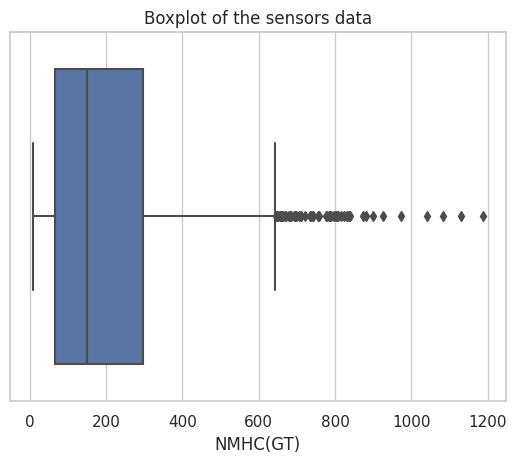

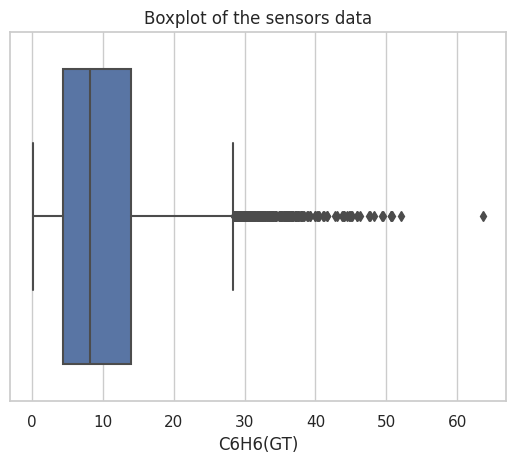

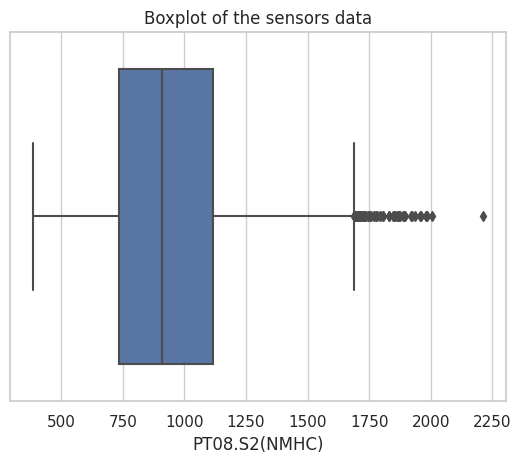

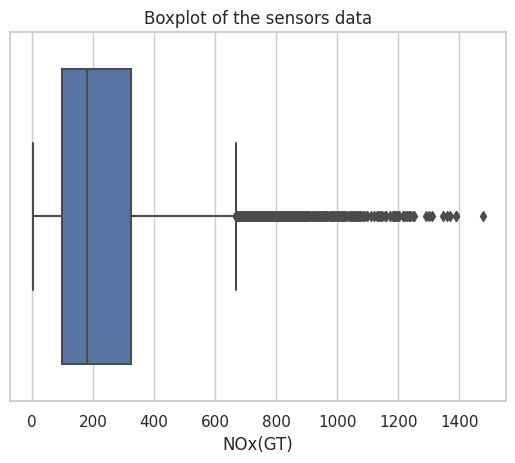

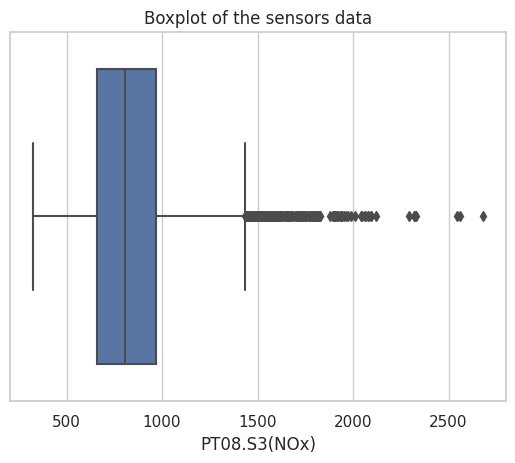

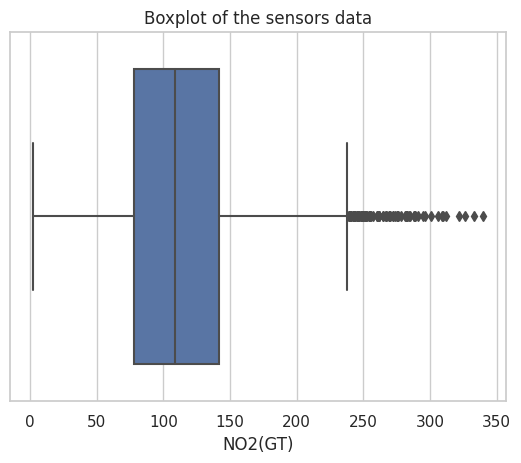

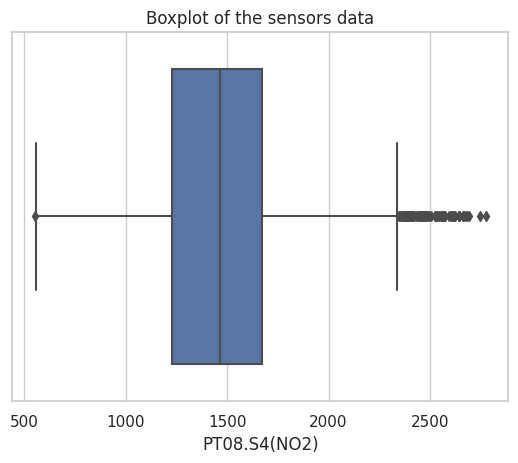

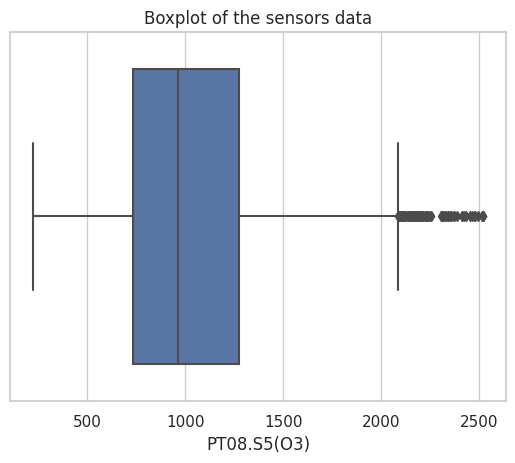

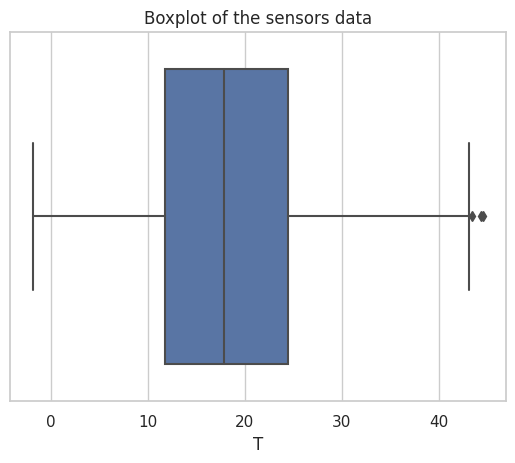

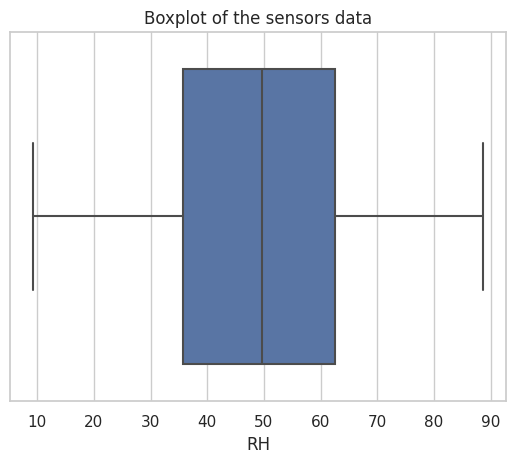

In [ ]:
for i in ar.columns[2:13]:
  sns.boxplot(x=ar[i])
  plt.title('Boxplot of the sensors data')
  plt.show()

In [ ]:
Ql = ar.quantile(0.25) #first 25% of the data
Q3 = ar.quantile(0.75) #first 75% of the data
!QR= Q3 - Ql

/bin/bash: Q3: command not found


<ipython-input-19-876be4067818>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Ql = ar.quantile(0.25) #first 25% of the data
<ipython-input-19-876be4067818>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = ar.quantile(0.75) #first 75% of the data


In [ ]:
ar.describe()


PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  8991.000000   914.000000  8991.000000    8991.000000  7718.000000   
mean   1099.833166   218.811816    10.083105     939.153376   246.896735   
std     217.080037   204.459921     7.449820     266.831429   212.979168   
min     647.000000     7.000000     0.100000     383.000000     2.000000   
25%     937.000000    67.000000     4.400000     734.500000    98.000000   
50%    1063.000000   150.000000     8.200000     909.000000   180.000000   
75%    1231.000000   297.000000    14.000000    1116.000000   326.000000   
max    2040.000000  1189.000000    63.700000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   8991.000000  7715.000000   8991.000000  8991.000000  8991.000000   
mean     835.493605   113.091251   1456.264598  1022.906128    18.317829   
std      256.817320    48.370108    346.206794   398.484288     8.832116   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      658.000000    78.000000   1227.000000   731.500000    11.800000   
50%      806.000000   109.000000   1463.000000   963.000000    17.800000   
75%      969.500000   142.000000   1674.000000  1273.500000    24.400000   
max     2683.000000   340.000000   2775.000000  2523.000000    44.600000   

                RH           AH  
count  8991.000000  8991.000000  
mean     49.234201     1.025530  
std      17.316892     0.403813  
min       9.200000     0.184700  
25%      35.800000     0.736800  
50%      49.600000     0.995400  
75%      62.500000     1.313700  
max      88.700000     2.231000

In [ ]:
ar.head()

Date      Time  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10  18:00:00       1360.0     150.0      11.9         1046.0   
1 2004-03-10  19:00:00       1292.0     112.0       9.4          955.0   
2 2004-03-10  20:00:00       1402.0      88.0       9.0          939.0   
3 2004-03-10  21:00:00       1376.0      80.0       9.2          948.0   
4 2004-03-10  22:00:00       1272.0      51.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

<ipython-input-26-ecf085e22641>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ar.corr(),annot=True,cmap = 'coolwarm')


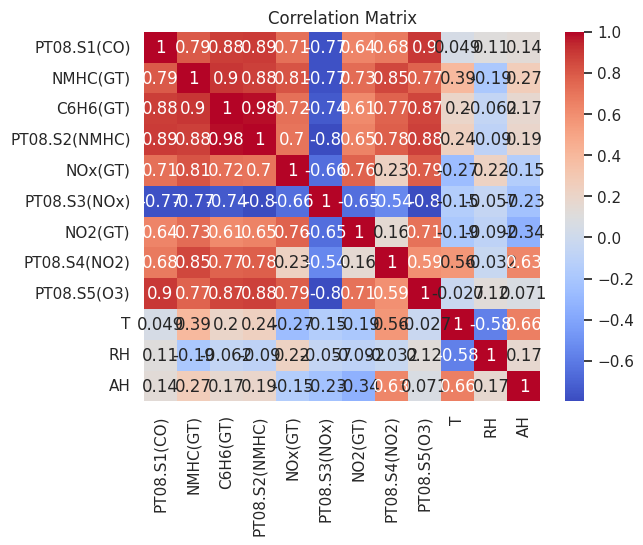

In [ ]:
sns.heatmap(ar.corr(),annot=True,cmap = 'coolwarm') 
plt.title('Correlation Matrix')
plt.show()

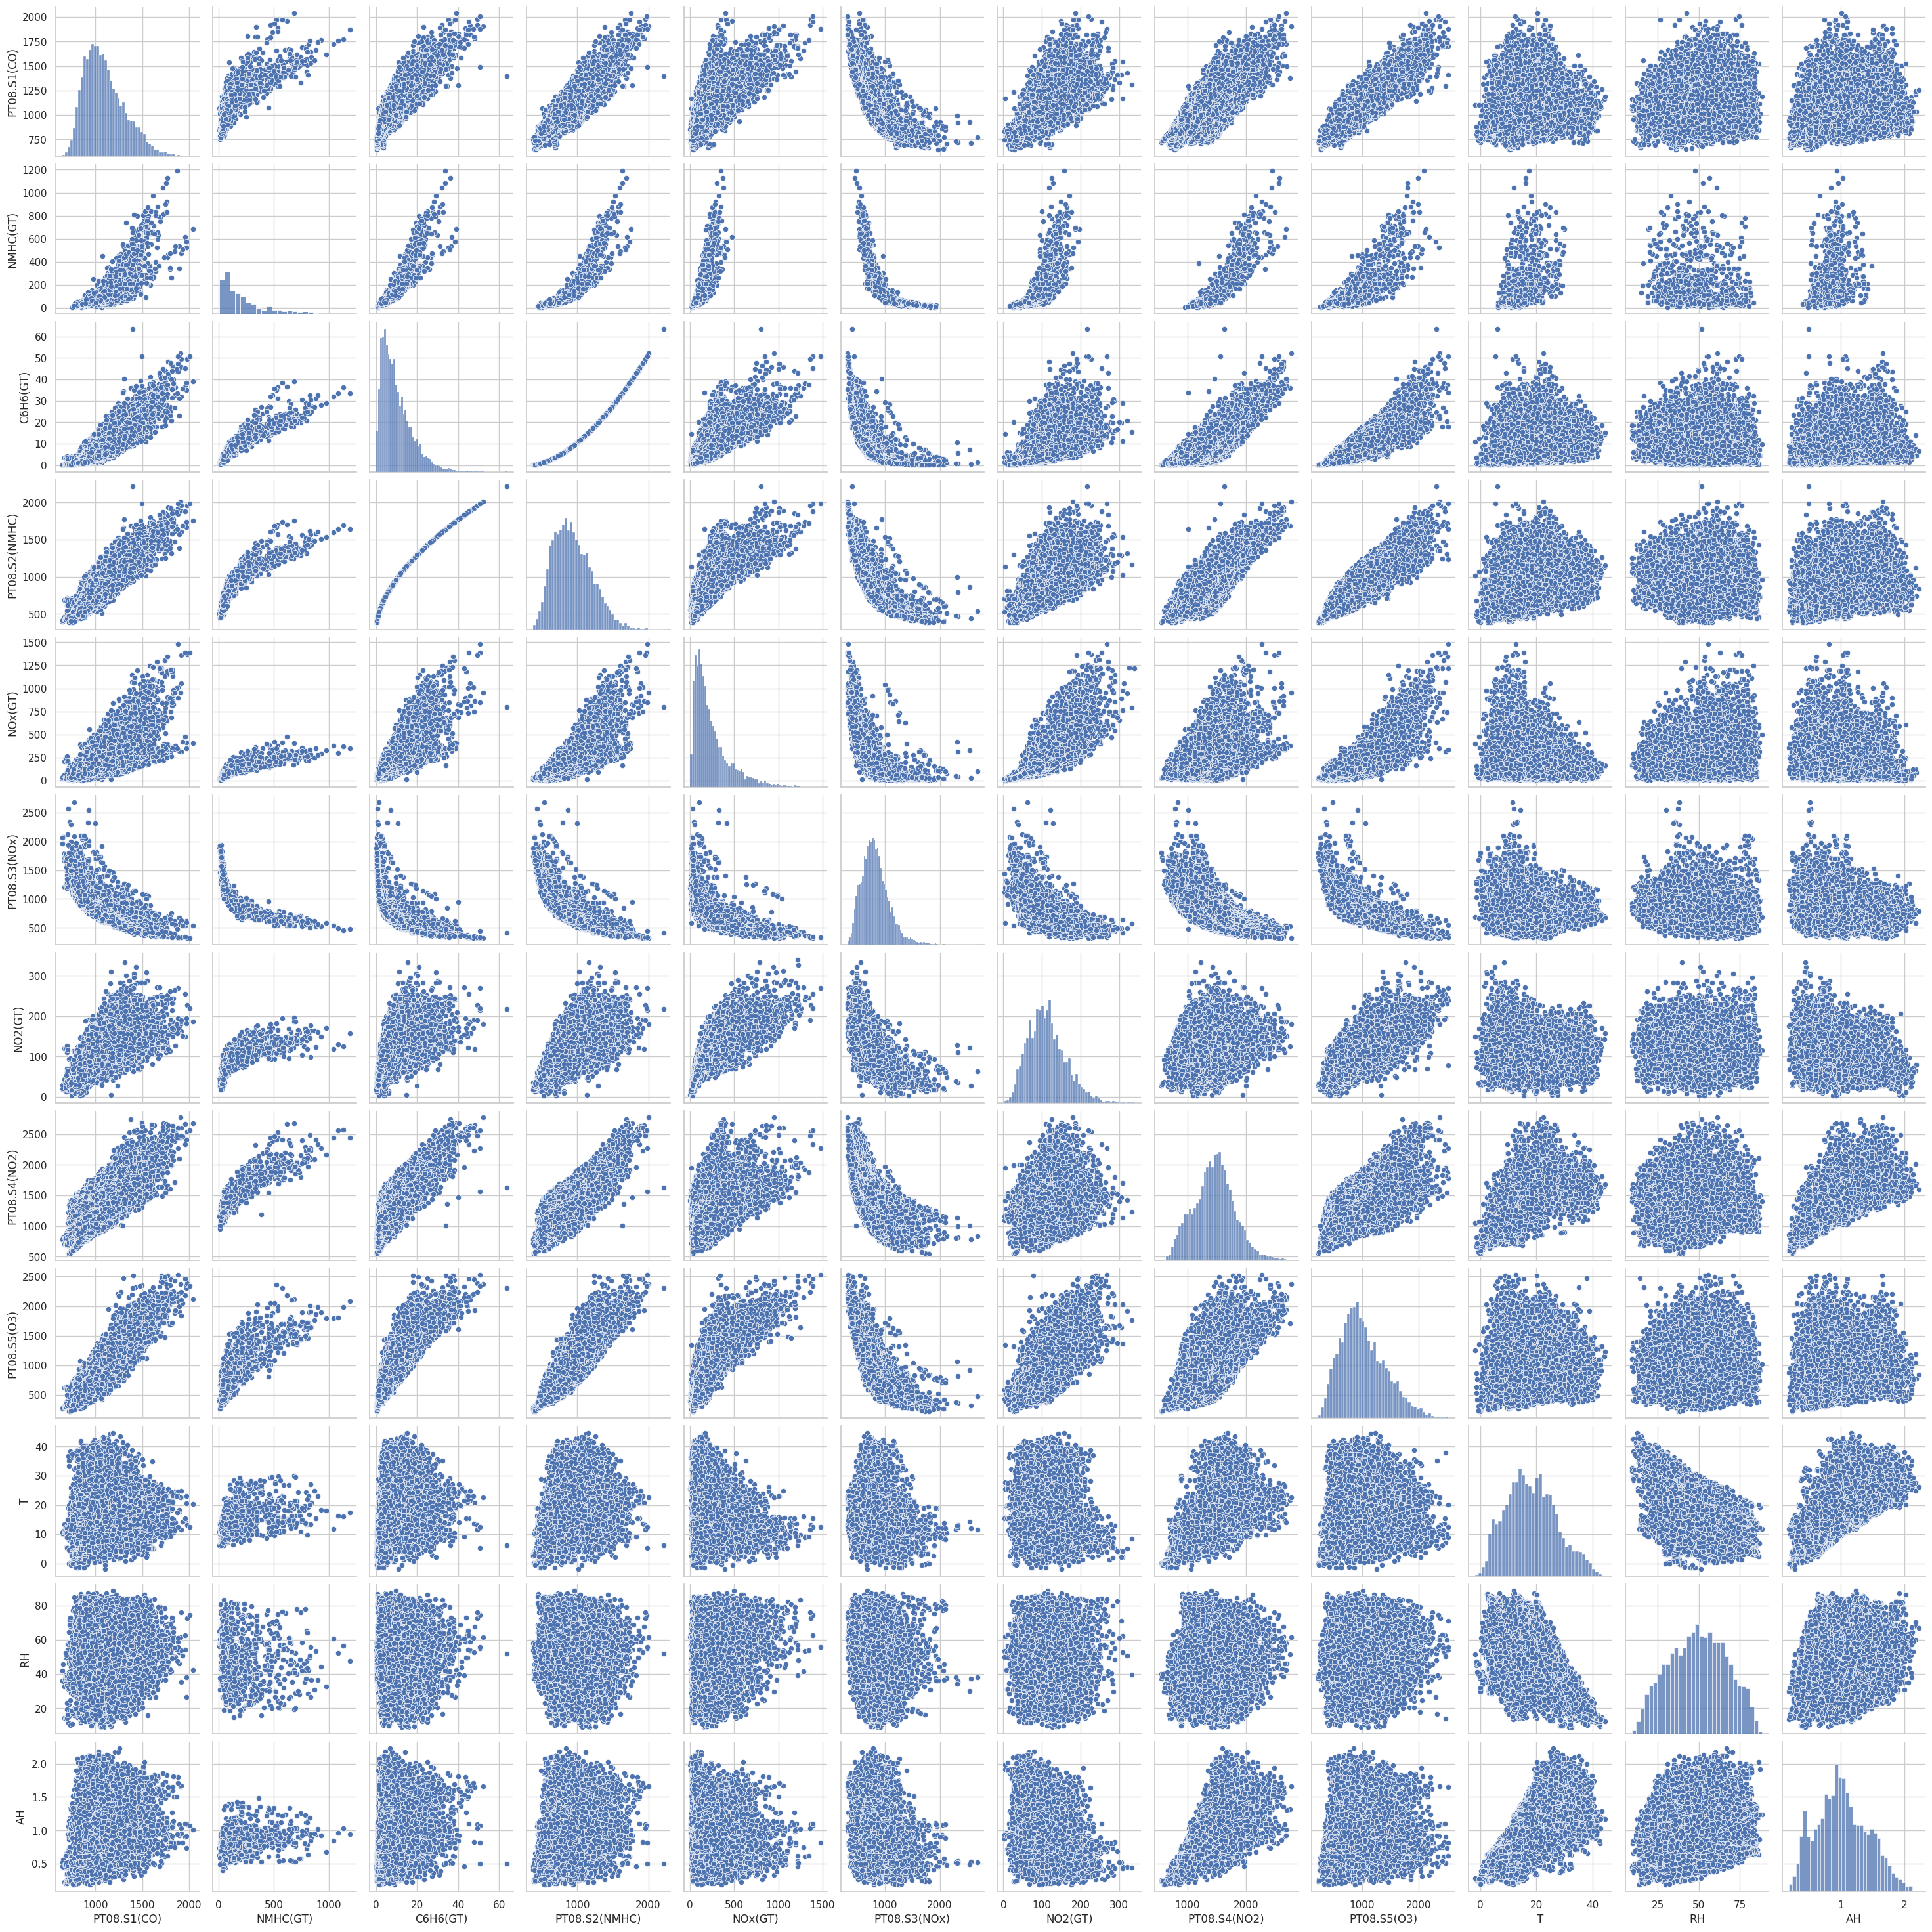

In [ ]:
sns.pairplot(ar)
plt. show()